# Pymaceuticals Inc.
---

### Analysis

- The sex of the mice were almost 50/50, but there were slightly more males.
- Capomulin was the treatment that had the most timepoints.
- The relationship between mouse weight and the average tumor volume has a correlation of 0.84, meaning there is a strong postive relationship between the mouse weight and average tumor volume.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_mouse_df = pd.merge(study_results, mouse_metadata, how = 'left', on= 'Mouse ID')

# Display the data table for preview
complete_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(complete_mouse_df["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate_mouse = complete_mouse_df[complete_mouse_df.duplicated(["Mouse ID", "Timepoint"])]

#printing the mouse ID of the duplicate mice
duplicate_mouse["Mouse ID"]

#getting the unique mouse ID of the duplicate mice
duplicate_mouse["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_to_drop = complete_mouse_df[complete_mouse_df["Mouse ID"] == "g989"]
mice_to_drop

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_index = mice_to_drop.index

clean_df = complete_mouse_df.drop(drop_index)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_df["Mouse ID"].unique()))

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
groupby_drug_df = clean_df.groupby(['Drug Regimen'])
groupby_drug_df.head()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = groupby_drug_df["Tumor Volume (mm3)"].mean()
drug_median = groupby_drug_df["Tumor Volume (mm3)"].median()
drug_variance = groupby_drug_df["Tumor Volume (mm3)"].var()
drug_sd = groupby_drug_df["Tumor Volume (mm3)"].std()
drug_sem = groupby_drug_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({ "Mean Tumor Volume" : drug_mean,
                            "Median Tumor Volume" : drug_median,
                            "Tumor Volume Variance" : drug_variance,
                            "Tumor Volume Std. Dev" : drug_sd,
                            "Tumor Volume Std. Err." : drug_sem})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[]

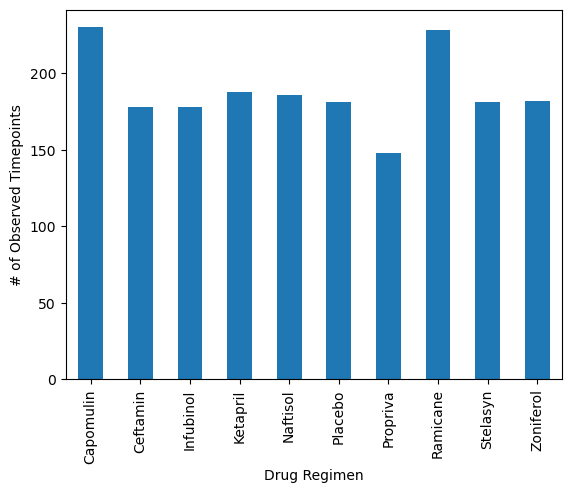

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint = groupby_drug_df["Timepoint"].count()
timepoint.plot(kind="bar")
plt.ylabel("# of Observed Timepoints")
plt.plot()

[]

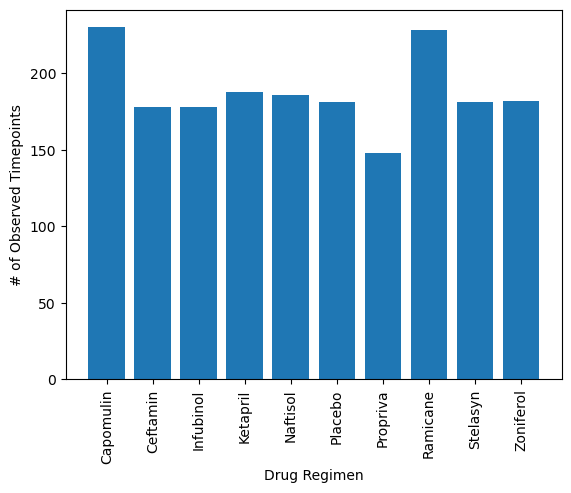

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(timepoint))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, timepoint)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
# https://pandas.pydata.org/docs/reference/api/pandas.Index.values.html
plt.xticks(tick_locations, timepoint.index.values, rotation = "vertical")
plt.plot()

[]

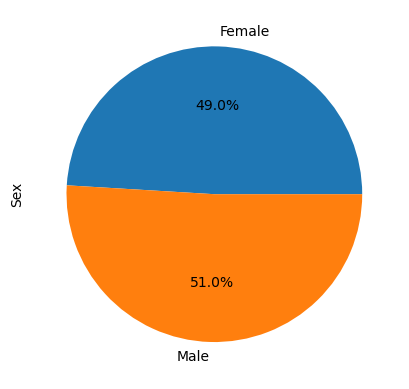

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#grouping by mouse's sex
sex = clean_df.groupby(["Sex"])["Sex"].count()

sex.plot(kind="pie", autopct='%1.1f%%')

plt.plot()

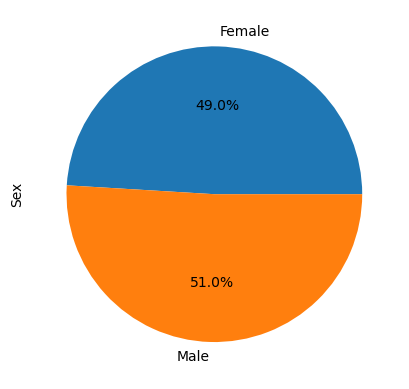

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels= ('Female', 'Male'), autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean_df = clean_df.reset_index()
final_tumor_volume = clean_df.groupby(["Mouse ID"])

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_df = final_tumor_volume["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_df = pd.merge(clean_df, final_tumor_df, on= ("Mouse ID", "Timepoint"), how= "right")

last_tumor_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1804,a203,45,67.973419,2,Infubinol,Female,20,23
1,1786,a251,45,65.525743,1,Infubinol,Female,21,25
2,1783,a262,45,70.717621,4,Placebo,Female,17,29
3,1856,a275,45,62.999356,3,Ceftamin,Female,20,28
4,1401,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin_data = []
ramicane_data = []
infubinol_data = []
ceftamin_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for row in range(len(last_tumor_df["Drug Regimen"])):
    if last_tumor_df["Drug Regimen"][row]== "Capomulin":
        capomulin_data.append(last_tumor_df["Tumor Volume (mm3)"][row])
    elif last_tumor_df["Drug Regimen"][row]== "Ramicane":
        ramicane_data.append(last_tumor_df["Tumor Volume (mm3)"][row])
    elif last_tumor_df["Drug Regimen"][row]== "Infubinol":
        infubinol_data.append(last_tumor_df["Tumor Volume (mm3)"][row])
    elif last_tumor_df["Drug Regimen"][row]== "Ceftamin":
        ceftamin_data.append(last_tumor_df["Tumor Volume (mm3)"][row])

capomulin_data = pd.DataFrame({"Tumor Volume (mm3)":capomulin_data})
ramicane_data = pd.DataFrame({"Tumor Volume (mm3)":ramicane_data})
infubinol_data = pd.DataFrame({"Tumor Volume (mm3)":infubinol_data})
ceftamin_data = pd.DataFrame({"Tumor Volume (mm3)":ceftamin_data})

#setting for loop to find outliers
for drug in range(len(treatments)):
    #setting the data to be run depending on the treatment
    if treatments[drug] == "Capomulin":
        data = capomulin_data
    elif treatments[drug] == "Ramicane":
        data = ramicane_data
    elif treatments[drug] == "Infubinol":
        data = infubinol_data
    elif treatments[drug] == "Ceftamin":
        data = ceftamin_data

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles  = data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    first= quartiles[0.25]
    third= quartiles[0.75]
    iqr  = third  - first
    lower_bound  = first  - (1.5 * iqr)
    upper_bound = third  + (1.5 * iqr )

    # Determine outliers using upper and lower bounds
    outliers = data.loc[(data["Tumor Volume (mm3)"]  < lower_bound ) |
                                   (data["Tumor Volume (mm3)"]  > upper_bound )]
    count_outliers = len(outliers)

    print(f"{treatments[drug]} outliers: {count_outliers}")

Capomulin outliers: 0
Ramicane outliers: 0
Infubinol outliers: 1
Ceftamin outliers: 0


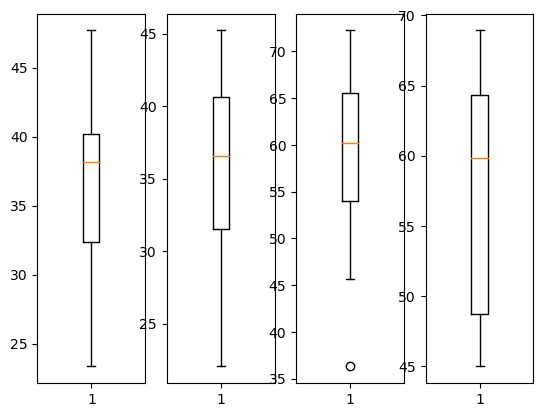

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
from matplotlib.patches import Polygon

fig, axs = plt.subplots(1,4)
axs[0].boxplot(capomulin_data["Tumor Volume (mm3)"])
axs[1].boxplot(ramicane_data["Tumor Volume (mm3)"])
axs[2].boxplot(infubinol_data["Tumor Volume (mm3)"])
axs[3].boxplot(ceftamin_data["Tumor Volume (mm3)"])

plt.show()

## Line and Scatter Plots

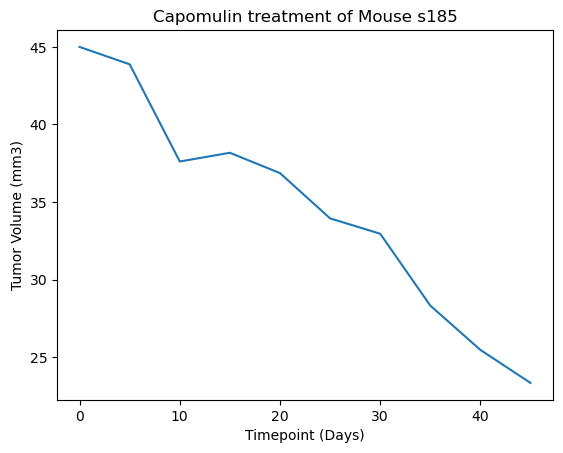

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_s185 = clean_df.loc[clean_df["Mouse ID"] == "s185"]
mouse_tumor = mouse_s185["Tumor Volume (mm3)"]
mouse_timepoint = mouse_s185["Timepoint"]

plt.plot(mouse_timepoint, mouse_tumor)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")
plt.title("Capomulin treatment of Mouse s185")
plt.show()

/var/folders/jw/dmfs8vy10ssfpf9j56cz60x40000gn/T/ipykernel_57173/1948768893.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_mouse = capomulin_summ.groupby(["Mouse ID"]).mean()


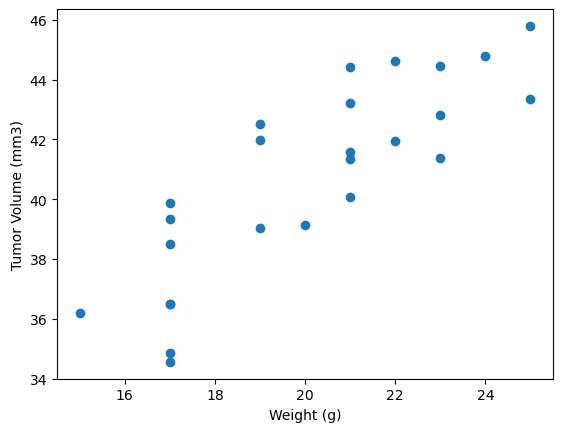

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_summ = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse = capomulin_summ.groupby(["Mouse ID"]).mean()
capomulin_tumors_avg = capomulin_mouse["Tumor Volume (mm3)"]
capomulin_weights = capomulin_mouse["Weight (g)"]

plt.scatter(capomulin_weights, capomulin_tumors_avg, marker = "o")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


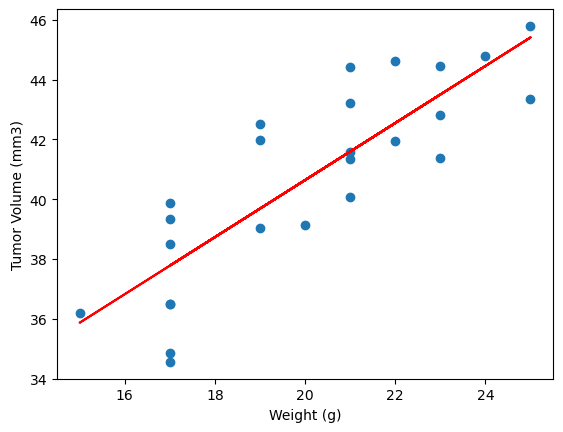

In [20]:
# Calculate the correlation coefficient and a linear regression model
corr = round(st.pearsonr(capomulin_weights, capomulin_tumors_avg)[0],2)
print("The correlation between mouse weight and the average tumor volume is",corr)
#for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

x_values = capomulin_weights
y_values = capomulin_tumors_avg

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()